## Step 1: Data Preprocessing

#### Name: Tian Lan

### Problem Summary

### Data Dictionary

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
suggvids = pd.read_csv('Tiktok_dataset/sug_users_vids_all.csv')
suggvids1 = pd.read_csv('Tiktok_dataset/sug_users_vids1.csv')
suggvids2 = pd.read_csv('Tiktok_dataset/sug_users_vids2.csv')
suggvids3 = pd.read_csv('Tiktok_dataset/sug_users_vids3.csv')
suggvids4 = pd.read_csv('Tiktok_dataset/sug_users_vids4.csv')
suggvids5 = pd.read_csv('Tiktok_dataset/top_users_vids.csv')

In [64]:
print(suggvids.shape)
print(suggvids1.shape)
print(suggvids2.shape)
print(suggvids3.shape)
print(suggvids4.shape)
print(suggvids5.shape)

(41702, 13)
(11921, 13)
(11903, 13)
(12677, 13)
(5201, 13)
(12559, 13)


In [65]:
data_df = pd.concat([suggvids, suggvids1, suggvids2, suggvids3, suggvids4, suggvids5])

In [66]:
data_df.sample(10)

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
13973,6848798172974763269,1594610091,australianreptilepark,"['koala', 'MagicMoment', 'animalencounters', '...",original sound,59,6339,215,71,50400,1500000,15100000,134
28208,6841545200163097858,1592921375,ranjeetrajak15,[],"Manohari (From ""Baahubali - The Beginning"")",10,148800,467,80,3500000,2100000,36900000,1612
2836,6840580627792661761,1592696808,luckydancer5454,"['teamlucky', 'luckydancer', 'foryou', 'fyp', ...",original sound - Vishal Mahadik,15,140400,857,678,1200000,18100000,765300000,2390
11450,6868894453755563266,1599289121,buteragari,"['ariana', 'grande', 'arianagrande', 'foryou',...",original sound,4,5749,30,34,39700,183000,3400000,237
5561,6883929249716161798,1602789728,bennythebull,[],I can not Bo Leave it Thejaysalazar,9,31800,144,187,233200,3200000,50800000,174
11267,6848083901861170433,1594443789,kimskennel,"['강아지', '비숑', '맹수', '사냥', '사냥본능', '미니비숑', 'pup...",Wink Wink,18,1943,33,16,14100,531100,6000000,290
20997,6880519907369372934,1601995953,shaolin.kungfu1,"['kungfu', 'sports', 'shaolin', 'shaolinkungfu...",Toca,12,47400,444,138,876700,1200000,8400000,275
2811,6887643220759629061,1603654439,mirandasings,[],Nightmare Before Christmas - Main Theme,27,50800,46,578,341100,10600000,119700000,266
6149,6890838283899751682,1604398315,hira_khan_official,['hirakhan'],original sound - Bindu,14,26600,184,347,167400,2300000,40300000,1017
8450,6837737575571016966,1592034846,zamfam_4ever,[],original sound,10,564,1,4,2764,9058,3853,14


In [67]:
print(f'The Tiktok dataset has {data_df.shape[0]} rows and {data_df.shape[1]} columns.')

The Tiktok dataset has 95963 rows and 13 columns.


In [68]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95963 entries, 0 to 12558
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             95963 non-null  int64 
 1   create_time    95963 non-null  int64 
 2   user_name      95963 non-null  object
 3   hashtags       95963 non-null  object
 4   song           95892 non-null  object
 5   video_length   95963 non-null  int64 
 6   n_likes        95963 non-null  int64 
 7   n_shares       95963 non-null  int64 
 8   n_comments     95963 non-null  int64 
 9   n_plays        95963 non-null  int64 
 10  n_followers    95963 non-null  int64 
 11  n_total_likes  95963 non-null  int64 
 12  n_total_vids   95963 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 10.2+ MB


#### Check duplicated rows

In [69]:
data_df.duplicated().sum()

43119

In [70]:
(data_df.duplicated().sum() / data_df.shape[0]) * 100

44.932942905078

Based on an analysis of the dataset, it was observed that approximately 45% of the total records consisted of duplicated rows. This considerable percentage necessitates a meticulous estimation of the duplicated rows prior to their removal.

In [71]:
duplicates = data_df[data_df.duplicated(keep=False)].copy()

duplicates

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,6892428462015958273,1604768557,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,1604619960,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,1604497592,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211
3,6891050048403049730,1604447622,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,211
4,6890886086613126402,1604409445,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,6767921821300821254,1575779598,camilacabello,[],My Oh My,15,7000000,150500,45300,67700000,9100000,45500000,17
12058,237064298542501888,1496863248,camilacabello,['knownobetter'],Know No Better (feat. Quavo),18,882400,5540,6230,8600000,9100000,45500000,17
12131,6888785570168917254,1603920492,wewearcute,[],Slow Motion (feat. JoJo),15,197200,136,1249,1100000,10300000,528100000,1453
12273,6882780829563604229,1602522343,mariahandbill,"['NEW', 'bangenergy', 'fyp']",original sound,43,233100,180,1036,1300000,9800000,324900000,668


The verification of duplicated records can be effectively performed by employing a unique identifier (i.e. id) assigned to each entry. To accomplish this, a sampling technique can be used wherein a random selection of ID numbers is made. By examining the duplicated content associated with these selected IDs, a determination can be made regarding the authenticity of the duplication. This systematic approach ensures a comprehensive evaluation of the duplicated records before proceeding with any necessary actions, such as removal or consolidation.

In [72]:
sampled_duplicates = duplicates.sample(n=3, random_state=456)

sampled_duplicates

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
1235,6885557149536210181,1603168774,nfl,"['nickfoles', 'nfl', 'football', 'motivation',...",A Moment Apart - ODESZA,30,87200,1123,895,604300,5100000,147000000,523
27341,6793135596832345350,1581650136,eddy_skabeche,[],sonido original,8,637600,920,2128,5800000,2400000,11300000,30
6656,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743


In [73]:
duplicates[duplicates['id']==6885557149536210181]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
25059,6885557149536210181,1603168774,nfl,"['nickfoles', 'nfl', 'football', 'motivation',...",A Moment Apart - ODESZA,30,87200,1123,895,604300,5100000,147000000,523
1235,6885557149536210181,1603168774,nfl,"['nickfoles', 'nfl', 'football', 'motivation',...",A Moment Apart - ODESZA,30,87200,1123,895,604300,5100000,147000000,523


In [74]:
duplicates[duplicates['id']==6793135596832345350]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
27341,6793135596832345350,1581650136,eddy_skabeche,[],sonido original,8,637600,920,2128,5800000,2400000,11300000,30
3517,6793135596832345350,1581650136,eddy_skabeche,[],sonido original,8,637600,920,2128,5800000,2400000,11300000,30


In [75]:
duplicates[duplicates['id']==6884349740050435333]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
6656,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743
6656,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743
6659,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743


Upon careful observation, it appears that the duplications are indeed genuine and likely stem from duplicated records originating from different data sources. It is essential to address these duplicated rows as they can  impact the accuracy and reliability of subsequent popularity analysis. Consequently, it is advisable to proceed with the removal of these duplications to ensure the integrity of the data and enhance the validity of the popularity analysis.

In [76]:
clean_df = data_df.copy()

clean_df.drop_duplicates(keep = 'first', inplace = True)

print(f'The Tiktok dataset has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns after dropping duplicated rows.')

The Tiktok dataset has 52844 rows and 13 columns after dropping duplicated rows.


#### Check missing value

In [77]:
clean_df.isna().sum(axis=0)

id                0
create_time       0
user_name         0
hashtags          0
song             42
video_length      0
n_likes           0
n_shares          0
n_comments        0
n_plays           0
n_followers       0
n_total_likes     0
n_total_vids      0
dtype: int64

In [78]:
clean_df[clean_df['song'].isna()].sample(10)

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
4930,6650347429537254662,1548404673,jacquelinef_143,['jummekiraat'],NaN,10,907500,5195,2968,12900000,13600000,84800000,61
16177,6834598031778663685,1591303861,maverickandcashbaker,[],NaN,8,283,0,0,1970,22400,52000,157
16259,6802231256798039302,1583767885,cash_xoxo_fan,[],NaN,11,458,2,11,2260,16000,59700,65
8108,6829896491218324738,1590209199,gauravarora_5,"['foryou', 'trending']",NaN,16,510700,1022,892,6200000,10800000,140900000,1817
11986,6748137443364539653,1571173188,lewiscapaldi,"['kingoftiktok', 'foryou']",NaN,9,493700,12800,3892,8100000,2600000,11800000,36
29941,6838969048907189509,1592321568,oolfat,"['WhatIdWear', 'foryoupage']",NaN,14,41600,143,786,481200,1900000,60800000,944
19274,6842682379413294338,1593186146,iamsamira68,[],NaN,15,3193,16,34,56400,1200000,10700000,726
698,6839535652367912194,1592453492,_arishfakhan_,"['arishfakhan', 'duetwitharishfa']",NaN,7,325800,1851,2621,4100000,28600000,1100000000,2026
28898,6844022924194761985,1593498266,varunsoni1,[],NaN,10,1342,12,22,27600,2800000,60400000,1213
2891,6812367025785081094,1586127802,camerondallas,['smh'],NaN,10,1800000,25000,15200,11600000,17900000,311600000,84


Within the dataset, a total of 42 rows have been identified where the `song` column contains NaN values. In the given context, this occurrence can be reasonably explained as users choosing not to utilize any background music for their videos. To address these missing values, the approach will involve replacing the NaN entries with the value **original sound** to accurately reflect the absence of a selected song for those particular instances.

In [79]:
clean_df['song'].fillna('original sound', inplace=True)

In [80]:
clean_df.isna().sum(axis=0)

id               0
create_time      0
user_name        0
hashtags         0
song             0
video_length     0
n_likes          0
n_shares         0
n_comments       0
n_plays          0
n_followers      0
n_total_likes    0
n_total_vids     0
dtype: int64

#### Check data type

In [81]:
clean_df.dtypes

id                int64
create_time       int64
user_name        object
hashtags         object
song             object
video_length      int64
n_likes           int64
n_shares          int64
n_comments        int64
n_plays           int64
n_followers       int64
n_total_likes     int64
n_total_vids      int64
dtype: object

Within the dataset, there are certain columns whose data types are not appropriate for the intended analysis. I'll apply the following adjustments:

- `create_time`: The `create_time` column should be converted to the datetime type. Once converted, additional features can be derived from this column, such as extracting the year, month, day, weekday, and distinguishing between morning, afternoon, and evening timestamps.

- `hashtags`: The `hashtags` column consists of a list of hashtags associated with each entry. To appropriately represent these hashtags in a machine learning model, a one-hot encoding technique can be applied. Each unique hashtag can be encoded using binary values of 0 and 1, indicating the absence or presence of the respective hashtag in a given entry. (I'll do it later.)

*`create_time` column*

In [82]:
clean_df['create_time'] = pd.to_datetime(clean_df['create_time'], unit='s')

clean_df['create_time']

0       2020-11-07 17:02:37
1       2020-11-05 23:46:00
2       2020-11-04 13:46:32
3       2020-11-03 23:53:42
4       2020-11-03 13:17:25
                ...        
12554   2020-09-26 16:12:13
12555   2020-09-25 16:41:32
12556   2020-09-25 16:05:06
12557   2020-09-24 18:06:55
12558   2020-09-24 17:08:57
Name: create_time, Length: 52844, dtype: datetime64[ns]

In [83]:
# extracting the year, month, day, weekday

clean_df['year'] = clean_df['create_time'].dt.year
clean_df['month'] = clean_df['create_time'].dt.month
clean_df['day'] = clean_df['create_time'].dt.day
clean_df['weekday'] = clean_df['create_time'].dt.weekday + 1

# range the weekday from 1 to 7, corresponding to Mon to Sun

In [84]:
# distinguishing between morning, afternoon, evening and midnight

clean_df['timestamp_period'] = ''

clean_df.loc[clean_df['create_time'].dt.hour < 6, 'timestamp_period'] = 'Midnight'
clean_df.loc[(clean_df['create_time'].dt.hour >= 6) & (clean_df['create_time'].dt.hour < 12), 'timestamp_period'] = 'Morning'
clean_df.loc[(clean_df['create_time'].dt.hour >= 12) & (clean_df['create_time'].dt.hour < 18), 'timestamp_period'] = 'Afternoon'
clean_df.loc[(clean_df['create_time'].dt.hour >= 18) & (clean_df['create_time'].dt.hour < 24), 'timestamp_period'] = 'Evening'

In [85]:
clean_df.sample(10)

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month,day,weekday,timestamp_period
1553,6891895207177063686,2020-11-06 06:35:08,siennamaegomezz,[],North Memphis,15,1800000,1721,8784,7100000,4100000,119500000,310,2020,11,6,5,Morning
18198,6892191917480709381,2020-11-07 01:45:13,danizvulun,['RHOSLC'],original sound,29,7788,7,35,26300,1800000,38200000,940,2020,11,7,6,Midnight
29181,6877325261113675010,2020-09-28 00:14:31,_luisalulu99,[],sonido original,11,11000,9,217,52400,310700,2300000,91,2020,9,28,1,Midnight
5587,6886203672380984581,2020-10-21 22:27:51,payton,[],original sound,12,811600,5945,11400,3900000,13500000,687300000,1251,2020,10,21,3,Evening
34757,6887580898611449094,2020-10-25 15:32:24,eyeinspired,"['art', 'satisfying', 'paint', 'draw', 'sketch...",Lowkey As Hell,13,56400,266,136,211300,3800000,97500000,368,2020,10,25,7,Afternoon
11913,6877584536448912646,2020-09-28 17:01:22,rug,['fyp'],barbie girl in a barbie world,18,280800,444,4442,1500000,4500000,79500000,152,2020,9,28,1,Afternoon
13557,6887695039078649093,2020-10-25 22:55:03,ondreazlopez,[],Black vine dood,6,1700000,3564,11800,10400000,21400000,1100000000,981,2020,10,25,7,Evening
20085,6830282063715863809,2020-05-24 05:42:52,shamitashettyofficial,"['trending', 'comedy', 'drop', 'jijasali']",original sound,10,265100,726,532,3100000,2900000,22500000,64,2020,5,24,7,Midnight
11567,6888445008198798597,2020-10-27 23:25:17,itstaylerholder,['tinderambassador'],original sound,17,1300000,1067,1925,5900000,16600000,795900000,1873,2020,10,27,2,Evening
8806,6804997329398041862,2020-03-17 02:25:10,terrycrews,"['iwillsurvive', 'washyourhands', 'xyzbca', 'x...",I Will Survive,15,3200000,78500,12100,26700000,11200000,38800000,52,2020,3,17,2,Midnight


In [86]:
clean_df = clean_df.drop('create_time', axis=1)

#### Change feature names for better understanding

In [87]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52844 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                52844 non-null  int64 
 1   user_name         52844 non-null  object
 2   hashtags          52844 non-null  object
 3   song              52844 non-null  object
 4   video_length      52844 non-null  int64 
 5   n_likes           52844 non-null  int64 
 6   n_shares          52844 non-null  int64 
 7   n_comments        52844 non-null  int64 
 8   n_plays           52844 non-null  int64 
 9   n_followers       52844 non-null  int64 
 10  n_total_likes     52844 non-null  int64 
 11  n_total_vids      52844 non-null  int64 
 12  year              52844 non-null  int32 
 13  month             52844 non-null  int32 
 14  day               52844 non-null  int32 
 15  weekday           52844 non-null  int32 
 16  timestamp_period  52844 non-null  object
dtypes: int32(4), int6

In [88]:
clean_df.rename(columns={'id': 'Video ID',
                    'create_time': 'Upload Time',
                    'user_name': 'User Name',
                    'hashtags': 'Hashtags',
                    'song': 'Song Title',
                    'video_length': 'Video Length',
                    'n_likes': 'Likes',
                    'n_shares': 'Shares',
                    'n_comments': 'Comments',
                    'n_plays': 'Views',
                    'n_followers': 'Followers',
                    'n_total_likes': 'Total Likes',
                    'n_total_vids': 'Total Videos',
                    'year': 'Upload Year',
                    'month': 'Upload Month',
                    'day': 'Upload Day',
                    'weekday': 'Upload Weekday',
                    'timestamp_period': 'Upload Period'}, 
                inplace = True)

In [89]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52844 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Video ID        52844 non-null  int64 
 1   User Name       52844 non-null  object
 2   Hashtags        52844 non-null  object
 3   Song Title      52844 non-null  object
 4   Video Length    52844 non-null  int64 
 5   Likes           52844 non-null  int64 
 6   Shares          52844 non-null  int64 
 7   Comments        52844 non-null  int64 
 8   Views           52844 non-null  int64 
 9   Followers       52844 non-null  int64 
 10  Total Likes     52844 non-null  int64 
 11  Total Videos    52844 non-null  int64 
 12  Upload Year     52844 non-null  int32 
 13  Upload Month    52844 non-null  int32 
 14  Upload Day      52844 non-null  int32 
 15  Upload Weekday  52844 non-null  int32 
 16  Upload Period   52844 non-null  object
dtypes: int32(4), int64(9), object(4)
memory usage: 6.5+ MB


#### Feature Engineering

Two new features, namely `Total Engagement`, `Engagement Rate` and `Number of Hashtags`, can be created based on the existing dataset.

`Total Engagement`: This feature represents the overall level of engagement generated by each video. It is computed by summing up relevant engagement metrics (i.e. likes, comments, and shares). By aggregating these metrics, the "Total Engagement" feature provides a comprehensive measure of the audience's interaction and involvement with a particular video.

`Engagement Rate`: The `Engagement Rate` feature quantifies the level of engagement relative to the size of the audience reached. The industry standard in social media typically calculated it as the ratio of the total engagement (as computed above) to the number of followers. This metric helps to gauge the effectiveness of a video in capturing the attention and interest of the audience on a per-follower basis.

`Number of Hashtags`: The `Number of Hashtags` feature represents lower-level data, it adds valuable insights to the dataset by allowing for a more granular analysis, correlation assessment, segmentation, and optimization strategies related to hashtag usage in TikTok videos.

`Total Engagement` feature

In [90]:
clean_df['Total Engagement'] = clean_df['Likes'] + clean_df['Shares'] + clean_df['Comments']

In [91]:
clean_df['Total Engagement'].describe()

count    5.284400e+04
mean     3.575558e+05
std      9.066833e+05
min      0.000000e+00
25%      1.172650e+04
50%      8.375700e+04
75%      3.179910e+05
max      2.296920e+07
Name: Total Engagement, dtype: float64

In [92]:
clean_df['Followers'].describe()

count    5.284400e+04
mean     6.901132e+06
std      8.812773e+06
min      0.000000e+00
25%      8.573000e+05
50%      3.500000e+06
75%      1.060000e+07
max      9.740000e+07
Name: Followers, dtype: float64

`Engagement Rate` feature

In [93]:
# Followers column contains 0 - set the Engagement Rate to 0

clean_df['Engagement Rate'] = np.where(clean_df['Followers'] == 0, 0, \
                                       (clean_df['Total Engagement'] / clean_df['Followers']))

In [94]:
clean_df['Engagement Rate'].describe()

count    52844.000000
mean         0.067889
std          0.202538
min          0.000000
25%          0.009068
50%          0.023812
75%          0.060788
max         14.970815
Name: Engagement Rate, dtype: float64

Based on the observed data, it is evident that the average engagement rate is approximately 6.8%. However, a notable disparity arises when considering the 75th percentile, which stands at around 6%, while the maximum engagement rate approaches 15%. This substantial difference strongly suggests the presence of outliers within the dataset, potentially attributable to influential individuals who exhibit exceptional user loyalty and foster high levels of interaction.

This phenomenon is further supported by the visual representation provided by the boxplot, which clearly illustrates the presence of these outliers.

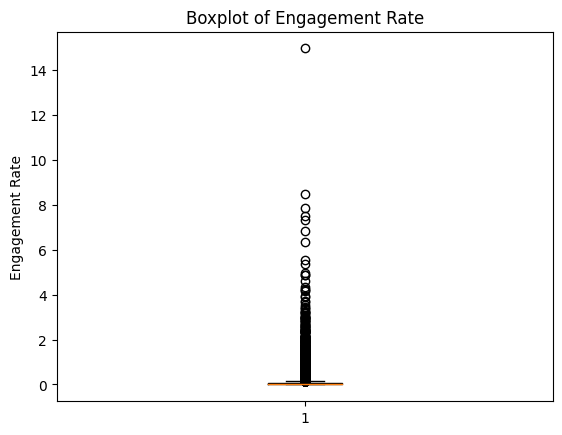

In [95]:
plt.boxplot(clean_df['Engagement Rate'])
plt.title('Boxplot of Engagement Rate')
plt.ylabel('Engagement Rate')
plt.show()

In [96]:
clean_df.loc[clean_df['Engagement Rate'].idxmax()]

Video ID                  6848684775780158726
User Name               payton.moormeier.faan
Hashtags                  ['paytonmoormeier']
Song Title          Obnimi - Callmearco Remix
Video Length                               10
Likes                                   26600
Shares                                    396
Comments                                  191
Views                                  123700
Followers                                1816
Total Likes                             69600
Total Videos                               77
Upload Year                              2020
Upload Month                                7
Upload Day                                 12
Upload Weekday                              7
Upload Period                         Evening
Total Engagement                        27187
Engagement Rate                     14.970815
Name: 22988, dtype: object

In [97]:
clean_df[clean_df['Video ID']==6848684775780158726]

,Video ID,User Name,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate
22988,6848684775780158726,payton.moormeier.faan,['paytonmoormeier'],Obnimi - Callmearco Remix,10,26600,396,191,123700,1816,69600,77,2020,7,12,7,Evening,27187,14.970815


Upon examining the row with the highest Engagement Rate, it appears that the corresponding user has only posted a single video within the collected timeframe. Notably, this particular video has garnered a significant number of views and likes, despite the user having a relatively small number of followers (less than 2,000).

Further investigation reveals that the user in question operates a fan page dedicated to Payton Moormeier, a well-known social media personality recognized for his comedy, dance, and lip-sync videos on platforms like TikTok. It is worth mentioning that during the video's upload period in July 2020, Payton Moormeier had recently released his first music and experienced a surge in popularity.

I'll drop the outliers using the interquartile range (IQR) method.

In [98]:
# Drop outliers

# Step 1: Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = clean_df['Engagement Rate'].quantile(0.25)
Q3 = clean_df['Engagement Rate'].quantile(0.75)

# Step 2: Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Step 3: Define the outlier boundaries
#lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 0.8 * IQR

# Step 4: Drop the outliers
clean_df = clean_df[clean_df['Engagement Rate'] <= upper_bound]

In [100]:
clean_df['Engagement Rate'].describe()

count    45077.000000
mean         0.026683
std          0.024610
min          0.000000
25%          0.007655
50%          0.018112
75%          0.039181
max          0.102158
Name: Engagement Rate, dtype: float64

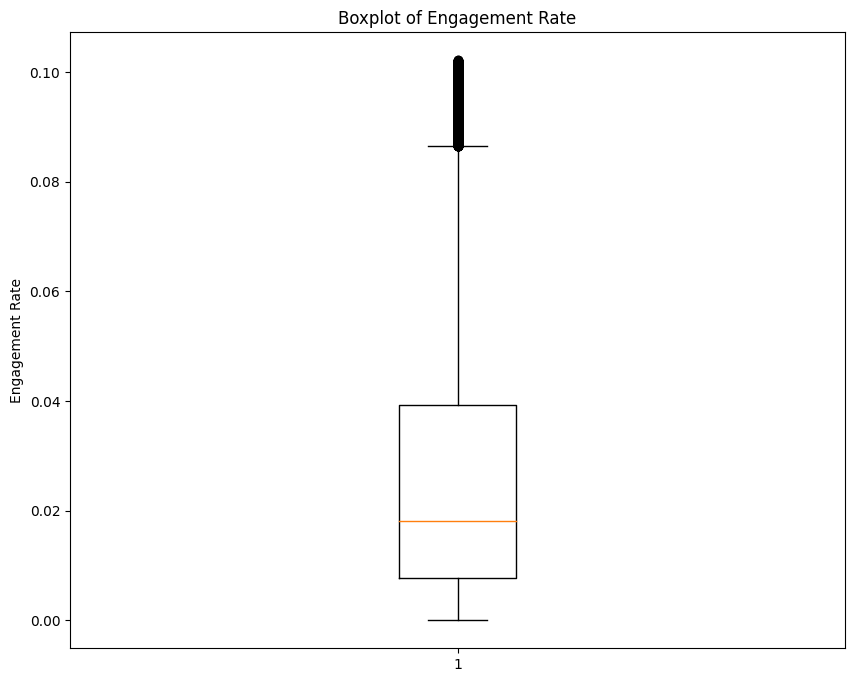

In [101]:
plt.figure(figsize=(10,8))

plt.boxplot(clean_df['Engagement Rate'])
plt.title('Boxplot of Engagement Rate')
plt.ylabel('Engagement Rate')

plt.show()

<Figure size 1000x800 with 0 Axes>

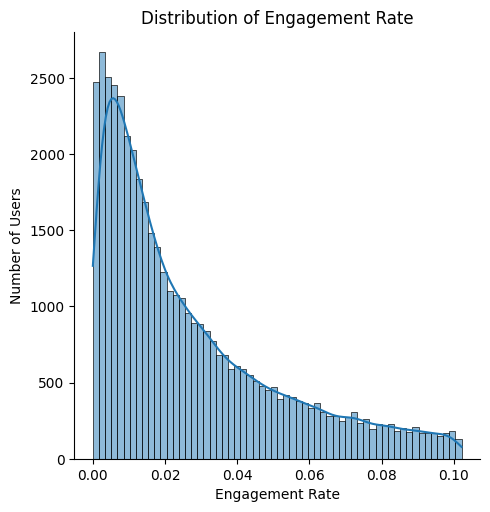

In [102]:
plt.figure(figsize=(10,8))

sns.displot(clean_df, x='Engagement Rate', bins=60, kde=True)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Number of Users')

plt.show()

`Number of Hashtags` feature

In [103]:
def amount_of_hashtags(hashtag_list):
    amount = []
    for i in hashtag_list:
        if i.replace("'", "").strip('][').split(', ') == ['']:
            amount.append(0)
        else:
            amount.append(len(i.replace("'", "").strip('][').split(', ')))
    return amount

In [104]:
clean_df['Number of Hashtags'] = amount_of_hashtags(clean_df['Hashtags'])

clean_df.sample(5)

,Video ID,User Name,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate,Number of Hashtags
3787,6889474804865305861,justmaikofanpage26,[],original sound,15,356,0,13,2340,26200,54500,110,2020,10,30,5,Evening,369,0.014084,0
15966,6868349064132545793,gabrielahotmail.com5,[],original sound,12,538,8,13,3417,24000,69900,63,2020,9,3,4,Evening,559,0.023292,0
4805,6883950167435906310,notdombrack,[],original sound,13,2895,6,84,15100,75000,380700,37,2020,10,15,4,Evening,2985,0.039800,0
30726,6888484130145783045,s.h.a.r.a.n.n,[],original sound,47,86300,50,407,320800,2900000,98800000,528,2020,10,28,3,Midnight,86757,0.029916,0
91,6860862161514777862,mrbeast,[],original sound,46,1200000,1851,80100,5800000,12600000,141000000,129,2020,8,14,5,Afternoon,1281951,0.101742,0


In [105]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45077 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            45077 non-null  int64  
 1   User Name           45077 non-null  object 
 2   Hashtags            45077 non-null  object 
 3   Song Title          45077 non-null  object 
 4   Video Length        45077 non-null  int64  
 5   Likes               45077 non-null  int64  
 6   Shares              45077 non-null  int64  
 7   Comments            45077 non-null  int64  
 8   Views               45077 non-null  int64  
 9   Followers           45077 non-null  int64  
 10  Total Likes         45077 non-null  int64  
 11  Total Videos        45077 non-null  int64  
 12  Upload Year         45077 non-null  int32  
 13  Upload Month        45077 non-null  int32  
 14  Upload Day          45077 non-null  int32  
 15  Upload Weekday      45077 non-null  int32  
 16  Upload Pe

#### Grouping data with duplicated meaning

After examination of the dataset, it has been discovered that the "Song Title" column contains values indicating the absence of background music in the videos. These values are expressed in multiple languages, suggesting that they all signify the usage of the original sound in the videos. To ensure consistency and facilitate analysis, I will standardize these values by replacing all language variants with the term "original sound." By treating these entries as a unified group, further analysis can be conducted to explore the characteristics and patterns associated with videos that utilize the original sound.

In [106]:
clean_df['Song Title'].value_counts()

Song Title
original sound                             20542
sonido original                             2682
оригинальный звук                            747
som original                                 639
Originalton                                  301
                                           ...  
Лютики                                         1
NOT WHAT U THINK IT IS officialnnaslyyy        1
Не надо меня узнавать                          1
Свобода и успех                                1
everybody wants you sept 10th                  1
Name: count, Length: 6843, dtype: int64

In [107]:
song_title_ori = clean_df[clean_df['Song Title'].str.contains('ori', case=False)]['Song Title'].value_counts()

song_title_ori

Song Title
original sound                                                       20542
sonido original                                                       2682
som original                                                           639
Originalton                                                            301
orijinal ses                                                           177
                                                                     ...  
original sound - aasheerfalak143                                         1
original sound - Little girl                                             1
original sound - 🚫⚡_SIDHARTH_⚡🚫                                          1
original sound - AYAN♠️                                                  1
Ironic (Originally Performed by Alanis Morissette) [Instrumental]        1
Name: count, Length: 959, dtype: int64

In [108]:
# only display the song title contain 'ori' that occur more than 10 times

song_title_ori[song_title_ori > 10].reset_index()

,Song Title,count
0,original sound,20542
1,sonido original,2682
2,som original,639
3,Originalton,301
4,orijinal ses,177
5,Original Sound,168
6,son original,104
7,Hit the Quan (Original Version),58
8,suono originale,55
9,origineel geluid,54


In [109]:
# Original Sound in Multiple Languages
# Song Titles Starting with "Original Sound - Username" representing 
# the song is originally created by the user indicated in the username

orig_sounds = ['original sound', 'sonido original', 'som original', 
               'Originalton', 'Original Sound', 'orijinal ses', 
               'son original', 'оригинальный звук', 'suono originale', 
               'origineel geluid']

In [110]:
clean_df['Song Title'] = clean_df['Song Title'].replace(orig_sounds, 'original sound')

In [111]:
clean_df['Song Title'].value_counts()

Song Title
original sound                             25469
الصوت الأصلي                                 293
Monkeys Spinning Monkeys                     120
Where Is The Love?                           116
Capone - Oh No                               106
                                           ...  
Лютики                                         1
NOT WHAT U THINK IT IS officialnnaslyyy        1
Не надо меня узнавать                          1
Свобода и успех                                1
everybody wants you sept 10th                  1
Name: count, Length: 6834, dtype: int64

Based on the observation, it is evident that the utilization of the original sound in video recordings constitutes more than half of the available video data. This finding suggests that the non-background music (non-BGM) type of TikTok videos holds significance within the dataset. It is important to note that this category may encompass various scenarios, including videos where users choose to use another device to play background music or videos where the usage of background audio is not explicitly indicated or marked.

In order to undertake a comprehensive investigation into the correlation between song titles and engagement rate, a meticulous analysis of popular songs, prevailing trends, and their respective occurrence rates becomes imperative. These valuable insights hold the potential to facilitate the optimization of title selection and content customization, enabling a stronger resonance with audiences and ultimately elevating the overall performance of music content within the dynamic and ever-changing landscape of the industry.

Nevertheless, it is essential to acknowledge that the scope of the current capstone project necessitates prioritizing other aspects. As such, a more exhaustive examination of this particular feature will be deferred to subsequent work beyond the scope of the current project.

#### Save clean dataset

In [112]:
clean_df.shape

(45077, 20)

In [113]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45077 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            45077 non-null  int64  
 1   User Name           45077 non-null  object 
 2   Hashtags            45077 non-null  object 
 3   Song Title          45077 non-null  object 
 4   Video Length        45077 non-null  int64  
 5   Likes               45077 non-null  int64  
 6   Shares              45077 non-null  int64  
 7   Comments            45077 non-null  int64  
 8   Views               45077 non-null  int64  
 9   Followers           45077 non-null  int64  
 10  Total Likes         45077 non-null  int64  
 11  Total Videos        45077 non-null  int64  
 12  Upload Year         45077 non-null  int32  
 13  Upload Month        45077 non-null  int32  
 14  Upload Day          45077 non-null  int32  
 15  Upload Weekday      45077 non-null  int32  
 16  Upload Pe

In [114]:
clean_df.to_csv('clean_data.csv', index=False)